## MODELOS DE SERIES DE TIMPO PARA DEMANDA DE GAS NATURAL EN SECTOR ELÉCTRICO EN MÉXICO 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sympy import true
from datetime import datetime, timedelta
register_matplotlib_converters()
from time import time 


Vamos a leer el csv de Demanda en sector eléctrico

In [2]:
demanda_electrico_xls = pd.read_excel(R'Demanda_electrico_2022_full1.xlsx')
demanda_electrico_xls

,Date,Demanded_Gas
0,2005-01-01,1819.58
1,2005-02-01,1895.33
2,2005-03-01,1765.86
3,2005-04-01,1642.70
4,2005-05-01,1895.54
...,...,...
208,2022-05-01,3350.03
209,2022-06-01,3498.70
210,2022-07-01,3350.97
211,2022-08-01,3506.42


In [3]:
demanda_electrico_xls.columns

Index(['Date', 'Demanded_Gas'], dtype='object')

In [4]:
demanda_electrico_xls_demanded_gas = demanda_electrico_xls['Demanded_Gas']
demanda_electrico_xls_demanded_gas

0      1819.58
1      1895.33
2      1765.86
3      1642.70
4      1895.54
        ...   
208    3350.03
209    3498.70
210    3350.97
211    3506.42
212    3778.37
Name: Demanded_Gas, Length: 213, dtype: float64

Vamos a graficar los datos de demanda eléctrico desde 2005 hasta 2022

Text(0, 0.5, 'Demanda [MMpcd]')

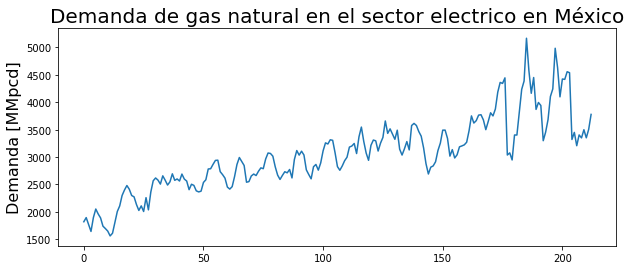

In [5]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_xls_demanded_gas)
plt.title('Demanda de gas natural en el sector electrico en México', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Se elaboran las gráficas de ACF y PACF de la Demanda de gas natural en el sector eléctrico en México

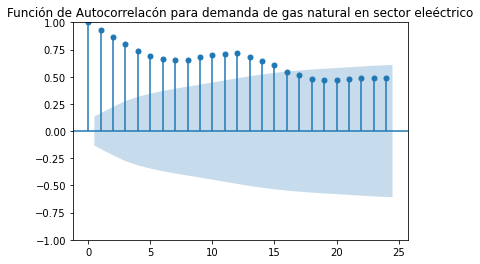

In [6]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_xls_demanded_gas.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector eleéctrico")

# Show the plot
plt.show()

c:\Users\llell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


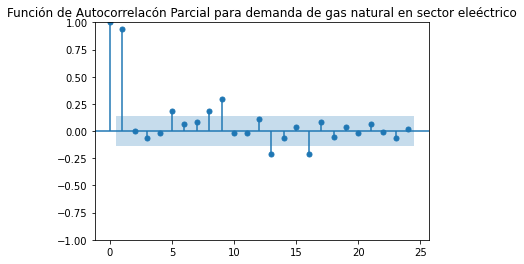

In [7]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_xls_demanded_gas.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector eleéctrico")

# Show the plot
plt.show()

Se procede entonces a diferenciar la serie para lograr estacionariedad 

In [8]:
demanda_electrico_xls_demanded_gas_diff1 = demanda_electrico_xls_demanded_gas.diff()
demanda_electrico_xls_demanded_gas_diff1

0         NaN
1       75.75
2     -129.47
3     -123.16
4      252.84
        ...  
208    -53.41
209    148.67
210   -147.73
211    155.45
212    271.95
Name: Demanded_Gas, Length: 213, dtype: float64

Se grafica la diferencia de demanda en el sector eléctrico 

Text(0, 0.5, ' Diferencia Demanda [MMpcd]')

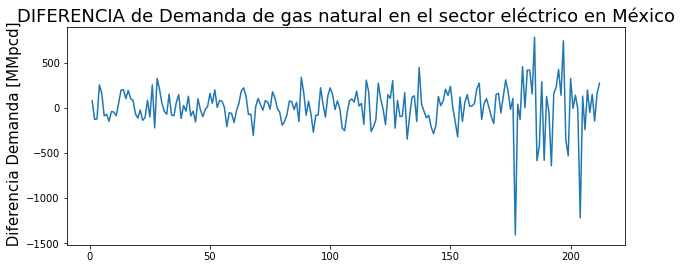

In [9]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_xls_demanded_gas_diff1)
plt.title('DIFERENCIA de Demanda de gas natural en el sector eléctrico en México', fontsize=18)
plt.ylabel(' Diferencia Demanda [MMpcd]', fontsize =15)

Se elaboran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México

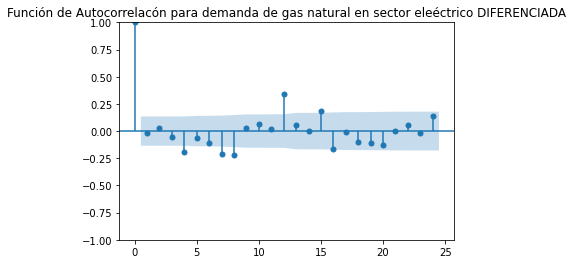

In [10]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_xls_demanded_gas_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector eleéctrico DIFERENCIADA")

# Show the plot
plt.show()

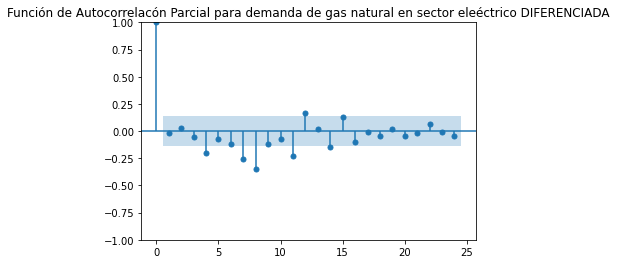

In [11]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_xls_demanded_gas_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector eleéctrico DIFERENCIADA")

# Show the plot
plt.show()

Separamos la Demanda de gas natural en el sector eléctrico en data de train y test

In [12]:
demanda_electrico_xls.set_index('Date', inplace=True)

In [13]:
## Get training and testing sets 
demanda_electrico_train_end = datetime(2021,9,1)
demanda_electrico_test_end = datetime(2022,9,1)
##This means we are taking from 2005 to 2018 as traning data to predict 2019 and 2020

demanda_electrico_train_data = demanda_electrico_xls[:demanda_electrico_train_end]
demanda_electrico_test_data = demanda_electrico_xls[demanda_electrico_train_end+ timedelta(days=1):demanda_electrico_test_end]
demanda_electrico_test_data


,Demanded_Gas
Date,
2021-10-01,4417.51
2021-11-01,4557.36
2021-12-01,4538.89
2022-01-01,3320.75
2022-02-01,3449.80
2022-03-01,3206.96
2022-04-01,3403.44
2022-05-01,3350.03
2022-06-01,3498.70


APLIQUEMOS UN MODELO ARIMA A NUESTRA DATA DE DEMANDA DE GAS NATURAL EN SECTOR ELECTRICO

In [14]:

##Create the model
model_ARIMA_electrico = ARIMA (demanda_electrico_train_data, order=(4,1,4))

##Fit the model
start = time()
model_ARIMA_electrico_fit = model_ARIMA_electrico.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_fit.summary())



c:\Users\llell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\llell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\llell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\llell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model fitting time 2.0012776851654053
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1333.360
Date:                Tue, 05 Sep 2023   AIC                           2684.720
Time:                        17:58:24   BIC                           2714.405
Sample:                    01-01-2005   HQIC                          2696.733
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8342      0.074     11.299      0.000       0.689       0.979
ar.L2         -0.4301      0.067     -6.429      0.000      -0.561      -0.299
ar.L3         

Hagamos predicciones con el modelo ARIMA para la Demanda de gas natural en el sector electrico

In [15]:

##get prediction start and end dates 
pred_model_ARIMA_electrico_start_date = demanda_electrico_test_data.index[0]
pred_model_ARIMA_electrico_end_date = demanda_electrico_test_data.index[-1]

##get the predictors and residuals 
predictions_model_ARIMA_electrico = model_ARIMA_electrico_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico)

2021-10-01    4128.656532
2021-11-01    3948.322540
2021-12-01    4079.739666
2022-01-01    3903.365966
2022-02-01    3792.281356
2022-03-01    4043.489945
2022-04-01    4034.852108
2022-05-01    3971.716654
2022-06-01    4237.098036
2022-07-01    4265.163525
2022-08-01    4126.423948
2022-09-01    4284.737045
Freq: MS, Name: predicted_mean, dtype: float64


Vamos a graficar las predicciones vs el real

Text(0, 0.5, 'Demanda [MMpcd]')

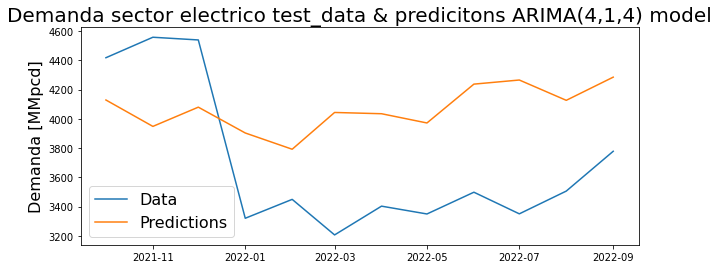

In [16]:

##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_test_data)
plt.plot(predictions_model_ARIMA_electrico)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(4,1,4) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Intentando otro modelo ARIMA para la data de Demanda de Gas natural en sector eléctrico

In [17]:
##Create the model
model_ARIMA_electrico2 = ARIMA (demanda_electrico_train_data, order=(4,1,3))

##Fit the model
start = time()
model_ARIMA_electrico_fit2 = model_ARIMA_electrico2.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_fit2.summary())

c:\Users\llell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\llell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\llell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\llell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ll

Model fitting time 1.274878740310669
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -1338.813
Date:                Tue, 05 Sep 2023   AIC                           2693.626
Time:                        17:58:26   BIC                           2720.013
Sample:                    01-01-2005   HQIC                          2704.305
                         - 09-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5336      0.115      4.648      0.000       0.309       0.759
ar.L2          0.7379      0.126      5.839      0.000       0.490       0.986
ar.L3         -

In [18]:

##get prediction start and end dates 
pred_model_ARIMA_electrico_start_date = demanda_electrico_test_data.index[0]
pred_model_ARIMA_electrico_end_date = demanda_electrico_test_data.index[-1]

##get the predictors and residuals 
predictions_model_ARIMA_electrico2 = model_ARIMA_electrico_fit2.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico2)

2021-10-01    4122.708761
2021-11-01    3986.777121
2021-12-01    3874.471411
2022-01-01    3808.597218
2022-02-01    3840.878683
2022-03-01    3906.437848
2022-04-01    4029.934236
2022-05-01    4141.576311
2022-06-01    4247.005217
2022-07-01    4299.219608
2022-08-01    4311.307112
2022-09-01    4269.120169
Freq: MS, Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

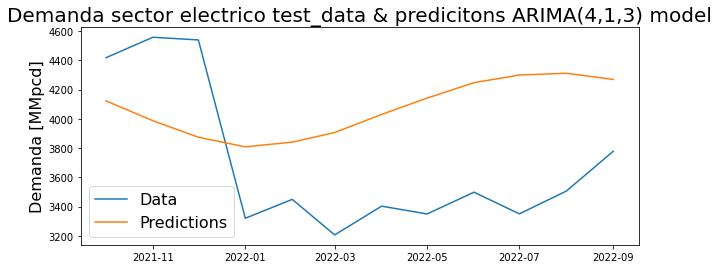

In [19]:

##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_test_data)
plt.plot(predictions_model_ARIMA_electrico2)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(4,1,3) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

### Proceso de AJUSTE de datos para mejora de modelos ARIMA 

In [63]:
demanda_electrico_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


In [28]:
# Calculate Q1 and Q3
Q1_demanda_electrico_train_data = demanda_electrico_train_data.quantile(0.25)
Q3_demanda_electrico_train_data = demanda_electrico_train_data.quantile(0.75)
IQR_demanda_electrico_train_data = Q3_demanda_electrico_train_data - Q1_demanda_electrico_train_data
IQR_demanda_electrico_train_data


Demanded_Gas    773.19
dtype: float64

In [31]:
# Identify outliers
outliers_demanda_electrico_train_data = demanda_electrico_train_data[(demanda_electrico_train_data < (Q1_demanda_electrico_train_data - 1.5 * IQR_demanda_electrico_train_data)) | (demanda_electrico_train_data > (Q3_demanda_electrico_train_data + 1.5 * IQR_demanda_electrico_train_data))]
print("Outliers:")
outliers_demanda_electrico_train_data

Outliers:


,Demanded_Gas
Date,
2005-01-01,NaN
2005-02-01,NaN
2005-03-01,NaN
2005-04-01,NaN
2005-05-01,NaN
...,...
2021-05-01,NaN
2021-06-01,4985.53
2021-07-01,4631.85


In [21]:
import pandas as pd
import numpy as np

# Load time series data into Pandas DataFrame
df_demanda_electrico_train_data = pd.DataFrame(demanda_electrico_train_data) 
df_demanda_electrico_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


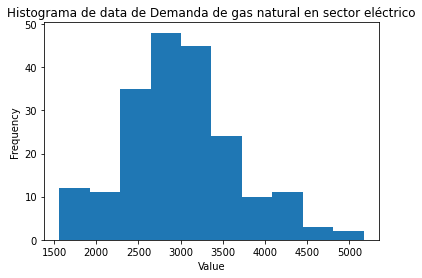

In [22]:
# Generate the histogram
plt.hist(df_demanda_electrico_train_data, bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico')

# Display the plot
plt.show()

In [35]:
import pandas as pd

def replace_outliers_with_monthly_mean(data):
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers
    outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
    
    # Iterate through each outlier
    for date, outlier_value in outliers.iteritems():
        # Extract the month and year
        month, year = date.month, date.year
        
        # Calculate the mean of the corresponding month for previous and subsequent years
        previous_year = year - 1
        subsequent_year = year + 1
        
        previous_month_mean = data[(data.index.month == month) & (data.index.year == previous_year)].mean()
        subsequent_month_mean = data[(data.index.month == month) & (data.index.year == subsequent_year)].mean()
        
        # Replace the outlier with the average of the previous and subsequent year's data
        data.loc[date] = (previous_month_mean + subsequent_month_mean) / 2
    
    return data

# Usage
demanda_electrico_train_data = replace_outliers_with_monthly_mean(demanda_electrico_train_data)


AttributeError: 'DataFrame' object has no attribute 'iteritems'

I apologize for the oversight. It seems that I used the iteritems method incorrectly. To replace the outliers, you can modify the function like this:

In [67]:
import pandas as pd

def replace_outliers_with_monthly_mean(data):
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers
    outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
    
    # Iterate through each outlier date
    for date in outliers.index:
        # Extract the month and year
        month, year = date.month, date.year
        
        # Calculate the mean of the corresponding month for previous and subsequent years
        previous_year = year - 1
        subsequent_year = year + 1
        
        previous_month_mean = data[(data.index.month == month) & (data.index.year == previous_year)].mean()
        subsequent_month_mean = data[(data.index.month == month) & (data.index.year == subsequent_year)].mean()
        
        # Replace the outlier with the average of the previous and subsequent year's data
        data.loc[date] = (previous_month_mean + subsequent_month_mean) / 2
    
    return data

# Usage
demanda_electrico_train_data_tratamiento_outliers = replace_outliers_with_monthly_mean(demanda_electrico_train_data)


C:\Users\Sergio\AppData\Local\Temp\ipykernel_14952\776850257.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[date] = (previous_month_mean + subsequent_month_mean) / 2


In [68]:
demanda_electrico_train_data_tratamiento_outliers

,Demanded_Gas
Date,
2005-01-01,NaN
2005-02-01,NaN
2005-03-01,NaN
2005-04-01,NaN
2005-05-01,NaN
...,...
2021-05-01,NaN
2021-06-01,NaN
2021-07-01,NaN


I apologize for the confusion. It seems there might be an issue with the code. Let's modify the function to ensure it correctly calculates the mean for the corresponding month across different years. We'll also handle cases where there might not be enough data to calculate a valid mean:

In [64]:
demanda_electrico_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


In [65]:
import pandas as pd

def replace_outliers_with_monthly_mean(data):
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers
    outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
    
    # Iterate through each outlier date
    for date in outliers.index:
        # Extract the month and year
        month, year = date.month, date.year
        
        # Calculate the mean of the corresponding month for previous and subsequent years
        previous_year = year - 1
        subsequent_year = year + 1
        
        previous_month_data = data[(data.index.month == month) & (data.index.year == previous_year)]
        subsequent_month_data = data[(data.index.month == month) & (data.index.year == subsequent_year)]
        
        # Calculate the mean if there is enough data, otherwise use a fallback strategy
        if len(previous_month_data) > 0 and len(subsequent_month_data) > 0:
            previous_month_mean = previous_month_data.mean().values[0]
            subsequent_month_mean = subsequent_month_data.mean().values[0]
            new_value = (previous_month_mean + subsequent_month_mean) / 2
        else:
            # If no data for the month in previous or subsequent years, use the mean of the whole dataset
            new_value = data.mean().values[0]
        
        # Replace the outlier with the calculated value
        data.loc[date] = new_value
    
    return data

# Usage
demanda_electrico_train_data_tratamiento_outliers = replace_outliers_with_monthly_mean(demanda_electrico_train_data)


C:\Users\Sergio\AppData\Local\Temp\ipykernel_14952\2287150531.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[date] = new_value


In [66]:
demanda_electrico_train_data_tratamiento_outliers

,Demanded_Gas
Date,
2005-01-01,2999.074876
2005-02-01,3004.943009
2005-03-01,3010.463472
2005-04-01,3016.655529
2005-05-01,3023.491129
...,...
2021-05-01,3112.542838
2021-06-01,3106.914047
2021-07-01,3097.567699


I apologize for the misunderstanding. I see the issue now. If you want to replace only the outliers with the calculated mean values, we need to adjust the code accordingly. Here's the modified function:

In [116]:
demanda_electrico_train_data

,Demanded_Gas
Date,
2005-01-01,NaN
2005-02-01,NaN
2005-03-01,NaN
2005-04-01,NaN
2005-05-01,NaN
...,...
2021-05-01,NaN
2021-06-01,NaN
2021-07-01,NaN


In [114]:
import pandas as pd

def replace_outliers_with_monthly_mean(data):
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers
    outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
    print(outliers) 
    
    # Iterate through each outlier date and replace only outliers
    for date, outlier_value in outliers.iterrows():
        # Extract the month and year
        month, year = date.month, date.year
        
        # Calculate the mean of the corresponding month for previous and subsequent years
        previous_year = year - 1
        subsequent_year = year + 1
        
        previous_month_data = data[(data.index.month == month) & (data.index.year == previous_year)]
        subsequent_month_data = data[(data.index.month == month) & (data.index.year == subsequent_year)]
        
        # Calculate the mean if there is enough data, otherwise use a fallback strategy
        previous_month_mean = previous_month_data.mean().values[0]
        subsequent_month_mean = subsequent_month_data.mean().values[0]
        new_value = (previous_month_mean + subsequent_month_mean) / 2
        
        # Replace the outlier with the calculated value
        data.loc[date] = new_value
    
    return data

# Usage
demanda_electrico_train_data_tratamiento_outliers = replace_outliers_with_monthly_mean(demanda_electrico_train_data)


            Demanded_Gas
Date                    
2005-01-01           NaN
2005-02-01           NaN
2005-03-01           NaN
2005-04-01           NaN
2005-05-01           NaN
...                  ...
2021-05-01           NaN
2021-06-01       4985.53
2021-07-01       4631.85
2021-08-01           NaN
2021-09-01           NaN

[201 rows x 1 columns]


C:\Users\Sergio\AppData\Local\Temp\ipykernel_14952\1590134770.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[date] = new_value


In [115]:
demanda_electrico_train_data_tratamiento_outliers

,Demanded_Gas
Date,
2005-01-01,NaN
2005-02-01,NaN
2005-03-01,NaN
2005-04-01,NaN
2005-05-01,NaN
...,...
2021-05-01,NaN
2021-06-01,NaN
2021-07-01,NaN



I apologize for the confusion. It looks like the code you provided still isn't correctly replacing the outliers. The issue seems to be related to the way the outliers are identified and replaced.

In [25]:
demanda_electrico_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


In [148]:
import pandas as pd

def replace_outliers_with_monthly_mean(data):
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers
    outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
    
    # Iterate through each outlier date and replace only outliers
    for date, outlier_value in outliers.iterrows():
        # Extract the month and year
        month, year = date.month, date.year
        print(month, year) 
        
        # Calculate the mean of the corresponding month for previous and subsequent years
        previous_year = year - 1
        subsequent_year = year + 1
        
        previous_month_data = data[(data.index.month == month) & (data.index.year == previous_year)]
        subsequent_month_data = data[(data.index.month == month) & (data.index.year == subsequent_year)]
        print(subsequent_month_data) 
        # Check if there is data for the previous and subsequent years, otherwise use the mean of the current year
        if len(previous_month_data) > 0 and len(subsequent_month_data) > 0:
            new_value = (previous_month_data.mean().values[0] + subsequent_month_data.mean().values[0]) / 2
        else:
            new_value = data[(data.index.month == month) & (data.index.year == year)].mean().values[0]
        
        # Replace the outlier with the calculated value
        print(new_value) 
        data.loc[date] = new_value
        
    return data

# Usage
demanda_electrico_train_data_tratamiento_outliers = replace_outliers_with_monthly_mean(demanda_electrico_train_data)


1 2005
            Demanded_Gas
Date                    
2006-01-01   1996.811875
1819.58
2 2005
            Demanded_Gas
Date                    
2006-02-01    2062.41625
1895.33
3 2005
            Demanded_Gas
Date                    
2006-03-01    1994.26875
1765.86
4 2005
            Demanded_Gas
Date                    
2006-04-01    1904.84375
1642.7
5 2005
            Demanded_Gas
Date                    
2006-05-01    2118.94875
1895.54
6 2005
            Demanded_Gas
Date                    
2006-06-01    2255.54375
2051.72
7 2005
            Demanded_Gas
Date                    
2006-07-01     2195.6325
1962.05
8 2005
            Demanded_Gas
Date                    
2006-08-01   2147.965625
1889.66
9 2005
            Demanded_Gas
Date                    
2006-09-01   2020.801875
1739.1
10 2005
            Demanded_Gas
Date                    
2006-10-01    1986.68375
1695.92
11 2005
            Demanded_Gas
Date                    
2006-11-01      1940.025
1648.95
12 2005
  

C:\Users\Sergio\AppData\Local\Temp\ipykernel_14952\4220514399.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[date] = new_value
C:\Users\Sergio\AppData\Local\Temp\ipykernel_14952\4220514399.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[date] = new_value
C:\Users\Sergio\AppData\Local\Temp\ipykernel_14952\4220514399.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[date] = new_value
C:\Users\Serg

2141.40953125
4 2007
            Demanded_Gas
Date                    
2008-04-01       2312.66
2098.25171875
5 2007
            Demanded_Gas
Date                    
2008-05-01   2503.736406
2306.65703125
6 2007
            Demanded_Gas
Date                    
2008-06-01   2619.503594
2434.4239062499996
7 2007
            Demanded_Gas
Date                    
2008-07-01   2584.262969
2383.0631249999997
8 2007
            Demanded_Gas
Date                    
2008-08-01   2549.660234
2338.4808593749995
9 2007
            Demanded_Gas
Date                    
2008-09-01   2398.146328
2191.112578125
10 2007
            Demanded_Gas
Date                    
2008-10-01   2354.019375
2150.68796875
11 2007
            Demanded_Gas
Date                    
2008-11-01   2331.188281
2120.5240624999997
12 2007
            Demanded_Gas
Date                    
2008-12-01   2289.429766
2060.1867968750003
1 2008
            Demanded_Gas
Date                    
2009-01-01   2390.988672
2257.218124

C:\Users\Sergio\AppData\Local\Temp\ipykernel_14952\4220514399.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[date] = new_value
C:\Users\Sergio\AppData\Local\Temp\ipykernel_14952\4220514399.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[date] = new_value
C:\Users\Sergio\AppData\Local\Temp\ipykernel_14952\4220514399.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[date] = new_value
C:\Users\Serg

            Demanded_Gas
Date                    
2010-09-01   2729.775312
2552.0914843749997
10 2009
            Demanded_Gas
Date                    
2010-10-01   2608.397266
2460.893984375
11 2009
            Demanded_Gas
Date                    
2010-11-01   2545.784922
2414.631796875
12 2009
            Demanded_Gas
Date                    
2010-12-01   2513.695234
2375.7725
1 2010
            Demanded_Gas
Date                    
2011-01-01   2602.750029
2491.9789599609367
2 2010
            Demanded_Gas
Date                    
2011-02-01   2637.791758
2526.71279296875
3 2010
            Demanded_Gas
Date                    
2011-03-01   2657.622129
2541.757314453125
4 2010
            Demanded_Gas
Date                    
2011-04-01   2687.109258
2549.4092773437496
5 2010
            Demanded_Gas
Date                    
2011-05-01   2886.637168
2755.717099609375
6 2010
            Demanded_Gas
Date                    
2011-06-01    3005.12666
2876.929423828125
7 2010
         

C:\Users\Sergio\AppData\Local\Temp\ipykernel_14952\4220514399.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[date] = new_value
C:\Users\Sergio\AppData\Local\Temp\ipykernel_14952\4220514399.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[date] = new_value
C:\Users\Sergio\AppData\Local\Temp\ipykernel_14952\4220514399.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[date] = new_value
C:\Users\Serg

            Demanded_Gas
Date                    
2013-08-01   3236.267236
3109.391018066406
9 2012
            Demanded_Gas
Date                    
2013-09-01   3221.207139
3067.308073730469
10 2012
            Demanded_Gas
Date                    
2013-10-01   3059.793242
2912.7649853515627
11 2012
            Demanded_Gas
Date                    
2013-11-01   2921.203379
2795.116884765625
12 2012
            Demanded_Gas
Date                    
2013-12-01   2872.599561
2752.8342700195312
1 2013
            Demanded_Gas
Date                    
2014-01-01    2881.45886
2803.6487890625
2 2013
            Demanded_Gas
Date                    
2014-02-01   2918.915981
2841.586494140625
3 2013
            Demanded_Gas
Date                    
2014-03-01   2950.284517
2867.2996289062503
4 2013
            Demanded_Gas
Date                    
2014-04-01   2985.075581
2894.2997167968747
5 2013
            Demanded_Gas
Date                    
2014-05-01   3092.207271
3027.8453125
6 2013


C:\Users\Sergio\AppData\Local\Temp\ipykernel_14952\4220514399.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[date] = new_value
C:\Users\Sergio\AppData\Local\Temp\ipykernel_14952\4220514399.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[date] = new_value
C:\Users\Sergio\AppData\Local\Temp\ipykernel_14952\4220514399.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[date] = new_value
C:\Users\Serg

            Demanded_Gas
Date                    
2016-09-01   3545.017326
3411.0299270629885
10 2015
            Demanded_Gas
Date                    
2016-10-01   3255.457854
3187.682138061524
11 2015
            Demanded_Gas
Date                    
2016-11-01   3203.909063
3111.7143347167967
12 2015
            Demanded_Gas
Date                    
2016-12-01   3099.078902
3021.284838562012
1 2016
            Demanded_Gas
Date                    
2017-01-01   3099.681212
3013.753184509277
2 2016
            Demanded_Gas
Date                    
2017-02-01   3177.035157
3082.6979122924804
3 2016
            Demanded_Gas
Date                    
2017-03-01   3280.906523
3153.8941418457034
4 2016
            Demanded_Gas
Date                    
2017-04-01   3350.061132
3203.6624478149415
5 2016
            Demanded_Gas
Date                    
2017-05-01    3449.93338
3304.9320550537113
6 2016
            Demanded_Gas
Date                    
2017-06-01    3741.17664
3545.25789550781

C:\Users\Sergio\AppData\Local\Temp\ipykernel_14952\4220514399.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[date] = new_value
C:\Users\Sergio\AppData\Local\Temp\ipykernel_14952\4220514399.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[date] = new_value
C:\Users\Sergio\AppData\Local\Temp\ipykernel_14952\4220514399.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[date] = new_value
C:\Users\Serg

            Demanded_Gas
Date                    
2020-08-01   4022.125743
3926.0780088424685
9 2019
            Demanded_Gas
Date                    
2020-09-01   4271.060834
4106.791374244691
10 2019
            Demanded_Gas
Date                    
2020-10-01       3869.77
3699.965020942688
11 2019
            Demanded_Gas
Date                    
2020-11-01       3996.14
3781.256117553711
12 2019
            Demanded_Gas
Date                    
2020-12-01       3941.12
3711.869750118256
1 2020
            Demanded_Gas
Date                    
2021-01-01       3298.43
3255.103994312286
2 2020
            Demanded_Gas
Date                    
2021-02-01       3454.21
3388.475274620056
3 2020
            Demanded_Gas
Date                    
2021-03-01        3681.3
3590.1193422317506
4 2020
            Demanded_Gas
Date                    
2021-04-01       4104.82
3924.0105932998654
5 2020
            Demanded_Gas
Date                    
2021-05-01       4243.93
4054.13941028595
6 

In [138]:
demanda_electrico_train_data_tratamiento_outliers

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


In [23]:
demanda_electrico_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


In [29]:
demanda_electrico_train_data.mean()

Demanded_Gas    2999.074876
dtype: float64

In [144]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

def replace_outliers_with_monthly_mean(data):
    # Convert the DataFrame to a numpy array for calculating Z-scores
    data_array = data.values
    
    # Calculate Z-scores for the data
    z_scores = zscore(data_array)
    
    # Identify outliers using a Z-score threshold (e.g., 3)
    threshold = 3
    outliers = (np.abs(z_scores) > threshold)
    
    # Iterate through each outlier date and replace only outliers
    for i, date in enumerate(data.index):
        if outliers[i]:
            # Extract the month and year
            month, year = date.month, date.year
            print(month, year) 
            
            # Calculate the mean of the corresponding month for previous and subsequent years
            previous_year = year - 1
            subsequent_year = year + 1
            
            previous_month_data = data[(data.index.month == month) & (data.index.year == previous_year)]
            subsequent_month_data = data[(data.index.month == month) & (data.index.year == subsequent_year)]
            
            # Check if there is data for the previous and subsequent years, otherwise use the mean of the current year
            if not previous_month_data.empty and not subsequent_month_data.empty:
                new_value = (previous_month_data.mean().values[0] + subsequent_month_data.mean().values[0]) / 2
            else:
                new_value = data[(data.index.month == month) & (data.index.year == year)].mean().values[0]
            
            # Replace the outlier with the calculated value
            data_array[i] = new_value
    
    # Update the DataFrame with the new values
    data.iloc[:, 0] = data_array
    
    return data

# Usage
demanda_electrico_train_data_tratamiento_outliers = replace_outliers_with_monthly_mean(demanda_electrico_train_data)


6 2021


In [143]:
demanda_electrico_train_data_tratamiento_outliers

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


In [65]:
demanda_electrico_xls = pd.read_excel(R'Demanda_electrico_2022_full1.xlsx')
demanda_electrico_xls

,Date,Demanded_Gas
0,2005-01-01,1819.58
1,2005-02-01,1895.33
2,2005-03-01,1765.86
3,2005-04-01,1642.70
4,2005-05-01,1895.54
...,...,...
208,2022-05-01,3350.03
209,2022-06-01,3498.70
210,2022-07-01,3350.97
211,2022-08-01,3506.42


In [66]:
demanda_electrico_xls['Date']

0     2005-01-01
1     2005-02-01
2     2005-03-01
3     2005-04-01
4     2005-05-01
         ...    
208   2022-05-01
209   2022-06-01
210   2022-07-01
211   2022-08-01
212   2022-09-01
Name: Date, Length: 213, dtype: datetime64[ns]

In [47]:
### demanda_electrico_xls.set_index('Date', inplace=True)

In [70]:
demanda_electrico_xls.index

RangeIndex(start=0, stop=213, step=1)

In [74]:
import pandas as pd

demanda_electrico_xls['Date'] = pd.to_datetime(demanda_electrico_xls['Date'])

# Split the data into train and test sets
demanda_electrico_xls_train_data = demanda_electrico_xls[:-12]
demanda_electrico_xls_test_data = demanda_electrico_xls[-12:]

# Print the test data
demanda_electrico_xls_test_data

,Date,Demanded_Gas
201,2021-10-01,4417.51
202,2021-11-01,4557.36
203,2021-12-01,4538.89
204,2022-01-01,3320.75
205,2022-02-01,3449.80
206,2022-03-01,3206.96
207,2022-04-01,3403.44
208,2022-05-01,3350.03
209,2022-06-01,3498.70
210,2022-07-01,3350.97


In [75]:
import pandas.api.types as ptypes

if ptypes.is_datetime64_any_dtype(demanda_electrico_xls_train_data.index):
    print("The index of your data frame is set to the 'Date' column and is of type 'DatetimeIndex'.")
else:
    print("The index of your data frame is not set to the 'Date' column or is not of type 'DatetimeIndex'.")


The index of your data frame is not set to the 'Date' column or is not of type 'DatetimeIndex'.


In [78]:
demanda_electrico_xls_train_data.set_index('Date', inplace=True)


In [79]:
demanda_electrico_xls_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


In [80]:
import pandas as pd

def remove_outliers(data):
    # Convert index to date object
    data.index = pd.to_datetime(data.index)
    
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers
    outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
    print(outliers)
    
    # Replace outliers with historical monthly mean
    for index, value in outliers.items():
        month = index.month
        print(month)
        year = index.year
        historical_mean = data[(data.index.month == month) & (data.index.year != year)].mean()
        data.loc[index] = historical_mean
        
    return data

In [81]:

# Remove outliers
demanda_electrico_train_data_tratamiento_outliers = remove_outliers(demanda_electrico_xls_train_data)


            Demanded_Gas
Date                    
2005-01-01           NaN
2005-02-01           NaN
2005-03-01           NaN
2005-04-01           NaN
2005-05-01           NaN
...                  ...
2021-05-01           NaN
2021-06-01       4985.53
2021-07-01       4631.85
2021-08-01           NaN
2021-09-01           NaN

[201 rows x 1 columns]


AttributeError: 'str' object has no attribute 'month'

In [58]:
demanda_electrico_xls_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


In [59]:
import pandas as pd

def remove_outliers(data):
    # Set date column as index
    data = data.set_index('date')
    
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers
    outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
    
    # Replace outliers with historical monthly mean
    for index, value in outliers.items():
        month = index.month
        year = index.year
        historical_mean = data[(data.index.month == month) & (data.index.year != year)].mean()
        data.loc[index] = historical_mean
        
    return data



In [64]:
demanda_electrico_xls_train_data['date']

KeyError: 'date'

In [63]:
# Convert date column to date object
demanda_electrico_train_data['date'] = pd.to_datetime(demanda_electrico_xls_train_data['date'])


KeyError: 'date'